In [40]:
import tweepy
import csv
import pandas as pd

from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

all_tweets = []

In [41]:
# function to display data of each tweet 
def printtweetdata(n, ith_tweet): 
    print() 
    print(f"Tweet {n}:") 
    print(f"Username:{ith_tweet[0]}") 
    print(f"Description:{ith_tweet[1]}") 
    print(f"Location:{ith_tweet[2]}") 
    print(f"Following Count:{ith_tweet[3]}") 
    print(f"Follower Count:{ith_tweet[4]}") 
    print(f"Total Tweets:{ith_tweet[5]}") 
    print(f"Retweet Count:{ith_tweet[6]}") 
    print(f"Tweet Text:{ith_tweet[7]}") 
    print(f"Hashtags Used:{ith_tweet[8]}") 


In [44]:
# function to perform data extraction 
def scrape(words, date_since, numtweet): 
      
    # Creating DataFrame using pandas 
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following', 
                               'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags']) 
      
    # We are using .Cursor() to search through twitter for the required tweets. 
    # The number of tweets can be restricted using .items(number of tweets) 
    tweets = tweepy.Cursor(api.search, q=words, lang="en", 
                           since=date_since, tweet_mode='extended').items(numtweet) 
     
    list_tweets = []
    while True:
        try:
            tweet = tweets.next()
            print(tweet)
            list_tweets.append(tweet)
            # Insert into db
        except tweepy.TweepError:
            time.sleep(60 * 15)
            continue
        except StopIteration:
            break
    # .Cursor() returns an iterable object. Each item in  
    # the iterator has various attributes that you can access to  
    # get information about each tweet 
    # list_tweets = [tweet for tweet in tweets] 
      
    # Counter to maintain Tweet Count 
    i = 1  
      
    # we will iterate over each tweet in the list for extracting information about each tweet 
    for tweet in list_tweets: 
        username = tweet.user.screen_name 
        description = tweet.user.description 
        location = tweet.user.location 
        following = tweet.user.friends_count 
        followers = tweet.user.followers_count 
        totaltweets = tweet.user.statuses_count 
        retweetcount = tweet.retweet_count 
        hashtags = tweet.entities['hashtags'] 
          
        # Retweets can be distinguished by a retweeted_status attribute, 
        # in case it is an invalid reference, except block will be executed 
        try: 
            text = tweet.retweeted_status.full_text 
            all_tweets.append(text)
            # print(text)
        except AttributeError: 
            text = tweet.full_text 
        hashtext = list() 
        for j in range(0, len(hashtags)): 
            hashtext.append(hashtags[j]['text']) 
          
        # Here we are appending all the extracted information in the DataFrame 
        ith_tweet = [username, description, location, following, 
                     followers, totaltweets, retweetcount, text, hashtext] 
        db.loc[len(db)] = ith_tweet 
          
        # Function call to print tweet data on screen 
        # printtweetdata(i, ith_tweet) 
        i = i+1
    filename = 'scraped_tweets.csv'
      
    # we will save our database as a CSV file. 
    db.to_csv(filename) 

In [52]:
 # Enter your own credentials obtained  
    # from your developer account 
consumer_key = "SCOPBRKeG4nRCEa7XkMoqQ"
consumer_secret = "RYInMkLiNyg0iKC3g89Y0f8g8kbNFSsNjZXNYBYILQ"
access_key = "107275871-PtAa9t7OJX82IEbGjdOzaFMgeCWQyU8haNPhN4mD"
access_secret = "Q691rTrztjXeYAP5FEA5kZWRhuFRtH8sq6msPgUeD1TzI"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
auth.set_access_token(access_key, access_secret) 
api = tweepy.API(auth) 
    
# Enter Hashtag and initial date 
# print("Enter Twitter HashTag to search for") 
words = 'covid19vaccine' 
# print("Enter Date since The Tweets are required in yyyy-mm--dd") 
date_since = '2016-01-01' 
    
# number of tweets you want to extract in one run 
numtweet = 1000  
scrape(words, date_since, numtweet) 
print('Scraping has completed!') 

: {'url': {'urls': [{'url': 'https://t.co/NBd9KGwRAU', 'expanded_url': 'https://www.ericadams2021.com/', 'display_url': 'ericadams2021.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3877, 'friends_count': 449, 'listed_count': 84, 'created_at': 'Sun Nov 04 18:17:48 +0000 2018', 'favourites_count': 2, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 941, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/1310062565750341633/bwInZ7l2_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/1310062565750341633/bwInZ7l2_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1059147716851310595/1

In [5]:


# ####input your credentials here
# consumer_key = 'SCOPBRKeG4nRCEa7XkMoqQ'
# consumer_secret = 'RYInMkLiNyg0iKC3g89Y0f8g8kbNFSsNjZXNYBYILQ'
# access_token = '107275871-PtAa9t7OJX82IEbGjdOzaFMgeCWQyU8haNPhN4mD'
# access_token_secret = 'Q691rTrztjXeYAP5FEA5kZWRhuFRtH8sq6msPgUeD1TzI'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# api = tweepy.API(auth,wait_on_rate_limit=True)
# #####United Airlines
# # Open/Create a file to append data
# csvFile = open('ua.csv', 'a')
# #Use csv Writer
# csvWriter = csv.writer(csvFile)

# all_tweets = []

# for tweet in tweepy.Cursor(api.search,q="#dulux",count=100,
#                            lang="en",
#                            since="2015-11-03").items():
#     print (tweet.created_at, tweet.text)
#     all_tweets.append(tweet.text)
#     csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

In [46]:
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nimendrapethiyagoda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [48]:
all_tweets
big_string = ' '.join(all_tweets)
input_text = process_text(big_string)

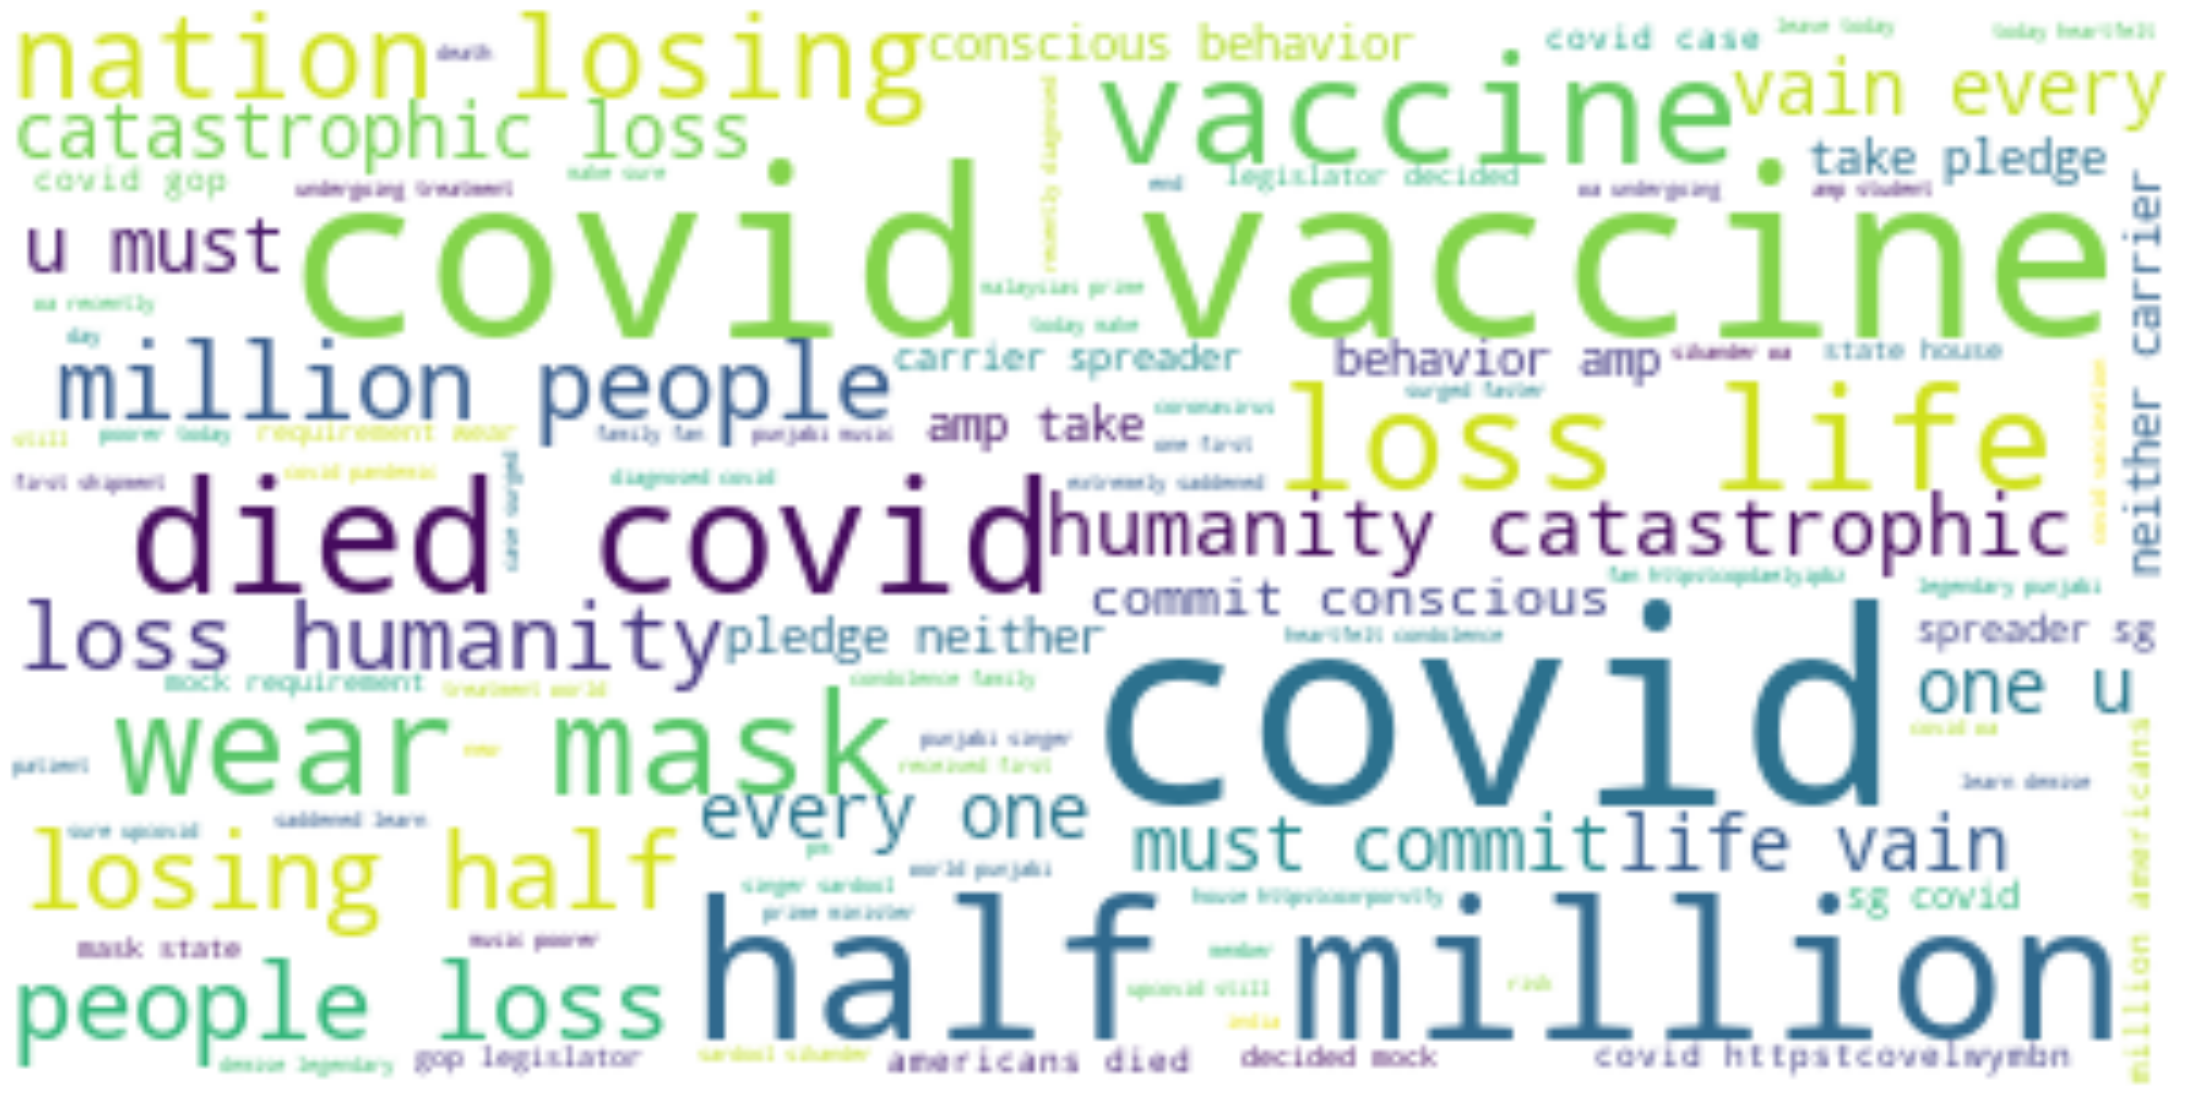

In [53]:
wc = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(input_text)
# plt.imshow(wc)
plt.figure(figsize=(100,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [50]:
def process_text_bg(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    sw_words = [word.lower() for word in lem if word.lower() not in sw]
    bigrams = ngrams(sw_words, 2)
    output = ['_'.join(i) for i in bigrams]
    return ' '.join(output)

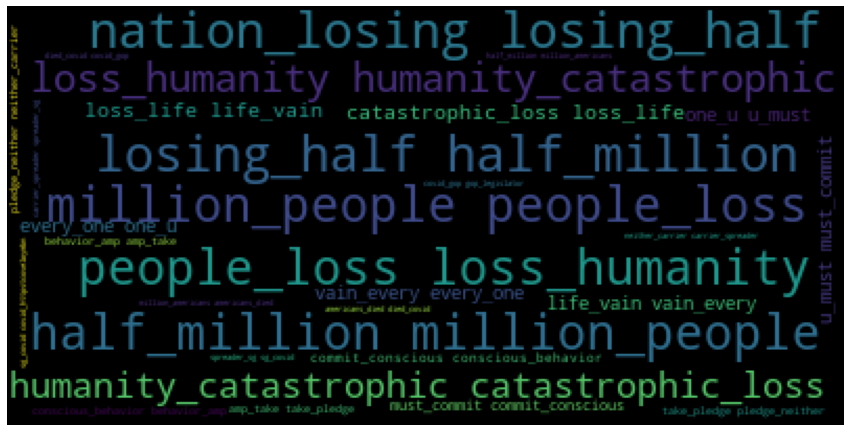

In [55]:
from nltk.util import ngrams
input_bigrams = process_text_bg(big_string)
wc = WordCloud().generate(input_bigrams)
plt.figure(figsize=(15,24))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [12]:
all_tweets

['Contractors Pembroke &amp; Bull transformed the Hilton DoubleTree Westminster using the time-saving touch-in properties of Dulux Trade Ultra Matt ⏰\n\nClick now to see how it could help you 👉 https://t.co/Tcbe8YKPyz',
 "Contractors Pembroke &amp; Bull transformed the Hilton DoubleTree Westminster using the time-saving touch-in properties of Dulux Trade Ultra Matt ⏰\n\nHere's how it could help you 👉 https://t.co/U39ryxnMTY",
 '@henrymartin1 Name me a single county that would adopt 1 clubs HUGE motion without some amendment ? It’s a good night for Clare GAA the Executive inc Chair, Vice Chair and Secretary showed some leadership, when you haven’t changed the wallpaper is so long a nice coat of dulux works fine by me',
 'Reports of a Dulux Tanker outside Bute House with a jumbo delivery of white wash.\n#SNPcorruption #snpout #snpout2021\nhttps://t.co/PskR0NI8nP',
 'Reports of a Dulux Tanker outside Bute House with a jumbo delivery of white wash.\n#SNPcorruption #snpout #snpout2021\nhttp